# Algorytmy ewolucyjne i metaheurystyczne - Heurystyki konstrukcyjne

**Install libs**

!pip install requests
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install pandoc

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

**Get data url:**

In [2]:
import requests

target_url_kroa100 = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/kroA100.tsp"
target_url_krob100 = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/kroB100.tsp"
target_url_kroa200 = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/kroA200.tsp"
target_url_krob200 = "http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/kroB200.tsp"


def get_file_from_url(target_url):
    file = requests.get(target_url)
    return file.text

<IPython.core.display.Javascript object>

**Output test:**

In [3]:
data = get_file_from_url(target_url_krob100)
for line in data.split("\n")[6:-2]:
    print(line.split())

['1', '3140', '1401']
['2', '556', '1056']
['3', '3675', '1522']
['4', '1182', '1853']
['5', '3595', '111']
['6', '962', '1895']
['7', '2030', '1186']
['8', '3507', '1851']
['9', '2642', '1269']
['10', '3438', '901']
['11', '3858', '1472']
['12', '2937', '1568']
['13', '376', '1018']
['14', '839', '1355']
['15', '706', '1925']
['16', '749', '920']
['17', '298', '615']
['18', '694', '552']
['19', '387', '190']
['20', '2801', '695']
['21', '3133', '1143']
['22', '1517', '266']
['23', '1538', '224']
['24', '844', '520']
['25', '2639', '1239']
['26', '3123', '217']
['27', '2489', '1520']
['28', '3834', '1827']
['29', '3417', '1808']
['30', '2938', '543']
['31', '71', '1323']
['32', '3245', '1828']
['33', '731', '1741']
['34', '2312', '1270']
['35', '2426', '1851']
['36', '380', '478']
['37', '2310', '635']
['38', '2830', '775']
['39', '3829', '513']
['40', '3684', '445']
['41', '171', '514']
['42', '627', '1261']
['43', '1490', '1123']
['44', '61', '81']
['45', '422', '542']
['46', '2698',

<IPython.core.display.Javascript object>

**Get lat lon from data**

In [4]:
def get_lat_lon_from_url(target_url):
    data = get_file_from_url(target_url)
    list_of_cords = data.split("\n")[6:-2]
    return zip(*[(int(i.split()[1]), int(i.split()[2])) for i in list_of_cords])


<IPython.core.display.Javascript object>

**Calculate matrix**

In [5]:
import pandas as pd
import numpy as np
import math


def calc_matrix(lat, lon):
    matrix_size = len(lat)
    matrix = pd.DataFrame(
        np.nan, index=np.arange(matrix_size), columns=np.arange(matrix_size)
    )
    for row in range(matrix.shape[0]):
        for col in range(row, matrix.shape[1]):
            if row == col:
                matrix.iat[row, col] = np.inf
            else:
                matrix.iat[row, col] = matrix.iat[col, row] = round(
                    math.sqrt(
                        ((lat[col] - lat[row]) ** 2) + ((lon[col] - lon[row]) ** 2)
                    )
                )

    return matrix

<IPython.core.display.Javascript object>

**Display steps dynamically**

In [6]:
import matplotlib.pyplot as plt


def test_display_dynamically(tedis, distance_matrix, lat, lon):
    from IPython.display import clear_output

    for elem in tedis:
        clear_output(wait=True)
        x, y = [], []
        plt.scatter(lat, lon, color="black")
        for i, vertex in enumerate(elem):
            x.append(lat[vertex])
            y.append(lon[vertex])
            plt.scatter(lat[vertex], lon[vertex], color="red", zorder=2)
            plt.annotate(i, (lat[vertex], lon[vertex]))
        plt.scatter(lat[elem[0]], lon[elem[0]], color="green", zorder=2)
        plt.plot(x, y, zorder=1)

        path_length = calculate_path_length(elem, distance_matrix)
        plt.figtext(
            1.02,
            0.5,
            "Path length {path_length}".format(path_length=path_length),
            horizontalalignment="center",
            wrap=True,
            fontsize=10,
            bbox={"facecolor": "grey", "alpha": 0.3, "pad": 5},
        )
        plt.pause(0.02)
    plt.show()
    return True

<IPython.core.display.Javascript object>

In [7]:
def get_combs(current_tsp):
    return [
        [current_tsp[i], current_tsp[i + 1]] for i, d in enumerate(current_tsp[:-1])
    ]


def calculate_path_length(tsp_final_outcome, distance_matrix):
    return sum(
        [distance_matrix.loc[x, y].sum() for (x, y) in get_combs(tsp_final_outcome)]
    )

<IPython.core.display.Javascript object>

**NN Algorithm:**

In [8]:
def get_clossest_points(distance_matrix, idx):
    num = round(0.5 * distance_matrix.shape[0] - 1)
    neigbrs = distance_matrix.nsmallest(num, idx)
    neigbrs_list = list(neigbrs.index)
    return neigbrs_list

<IPython.core.display.Javascript object>

In [9]:
import random


def tsp_nn(distance_matrix, selected_vertex=None):
    if selected_vertex is None:
        selected_vertex = random.randint(0, 99)

    # get rid off the furthest cords
    closest_points = get_clossest_points(distance_matrix, selected_vertex)
    distance_matrix_truncated = distance_matrix.loc[
        closest_points + [selected_vertex], closest_points + [selected_vertex]
    ]

    tsp_outcome = [selected_vertex]
    test_display = [tsp_outcome.copy()]
    for _ in range(distance_matrix_truncated.shape[0] - 1):
        # find minimum in column
        ix_min = int(distance_matrix_truncated[[selected_vertex]].idxmin())
        # push min to outcome
        tsp_outcome.append(ix_min)
        test_display.append(tsp_outcome.copy())
        # set distance to 0
        distance_matrix_truncated = distance_matrix_truncated.drop(
            index=selected_vertex, columns=selected_vertex
        )
        # set vertex as ix_min
        selected_vertex = ix_min

    tsp_outcome.append(tsp_outcome[0])
    test_display[-1].append(test_display[-1][0])
    return tsp_outcome, test_display

<IPython.core.display.Javascript object>

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

lat, lon = get_lat_lon_from_url(target_url_kroa100)
distance_matrix = calc_matrix(lat,lon)
tsp, tedis_nn= tsp_nn(distance_matrix, 41)



test_display_dynamically(tedis_nn, distance_matrix, lat, lon)

**NN ALG Run:**

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

distance_matrix = calc_matrix(lat,lon)


for i in range(10):
    tsp, ted = tsp_nn(distance_matrix,selected_vertex = i)
    print(len(tsp))

#test_display_dynamically(ted, distance_matrix,nn=True)

**Greedy Cycle Alg**

In [10]:
import pandas as pd
import numpy as np


def get_index_min_value_in_cols(list_of_cols, distance_matrix):
    distance_matrix_truncated = distance_matrix.drop(list(set(list_of_cols)))
    min_value_list = distance_matrix_truncated[list_of_cols].min()
    min_value = min_value_list.min()
    min_value_index_in_list = min_value_list.to_list().index(min_value)
    col_index_in_distance_matrix = list_of_cols[min_value_index_in_list]
    ix_min = int(distance_matrix_truncated[col_index_in_distance_matrix].idxmin())
    return ix_min

<IPython.core.display.Javascript object>

In [11]:
def get_min_length_to_point(point, current_tsp, distance_matrix):
    minimal_points = []
    current_minimal = 1000000000
    for (x, y) in get_combs(current_tsp):
        distance_matrix_truncated = distance_matrix.loc[[point], [x, y]]
        new_length = distance_matrix_truncated.sum().sum()
        x_y_distance = distance_matrix.loc[x, y].sum()
        total_length_increase = new_length - x_y_distance
        if total_length_increase < current_minimal:
            minimal_points = [x, y]
            current_minimal = total_length_increase
    return minimal_points


def insert_after_element(current_tsp, elem, value_to_insert):
    elem_index = current_tsp.index(elem)
    current_tsp.insert(elem_index + 1, value_to_insert)
    return current_tsp

<IPython.core.display.Javascript object>

In [12]:
import random
import numpy as np


def tsp_greedy(distance_matrix, selected_vertex=None):
    if selected_vertex is None:
        selected_vertex = random.randint(0, 99)

    # get rid off the furthest cords
    closest_points = get_clossest_points(distance_matrix, selected_vertex)
    distance_matrix_truncated = distance_matrix.loc[
        closest_points + [selected_vertex], closest_points + [selected_vertex]
    ]

    # find min distannce and connect
    ix_start_min = int(distance_matrix_truncated[[selected_vertex]].idxmin())
    tsp_outcome = [selected_vertex, ix_start_min, selected_vertex]

    test_display = [tsp_outcome.copy()]
    for _ in range(distance_matrix_truncated.shape[0] - 2):

        # find minimum in current tsp outcome
        ix_min = int(
            get_index_min_value_in_cols(tsp_outcome, distance_matrix_truncated)
        )

        # find suitable place to insert elem
        x, y = get_min_length_to_point(ix_min, tsp_outcome, distance_matrix_truncated)

        # push min to outcome
        tsp_outcome = insert_after_element(tsp_outcome, x, ix_min)
        test_display.append(tsp_outcome.copy())

    return tsp_outcome, distance_matrix_truncated, test_display

<IPython.core.display.Javascript object>

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

lat, lon = get_lat_lon_from_url(target_url_kroa100)
distance_matrix = calc_matrix(lat,lon)
tsp, d,tedis_greedy= tsp_greedy(distance_matrix, 41)



test_display_dynamically(tedis_greedy, distance_matrix, lat, lon)

**Regret ALG**

In [13]:
def get_cost(point, current_tsp, distance_matrix):
    minimal_points = []
    for (x, y) in get_combs(current_tsp):
        distance_matrix_truncated = distance_matrix.loc[[point], [x, y]]
        new_length = distance_matrix_truncated.sum().sum()
        x_y_distance = distance_matrix.loc[x, y].sum()
        total_cost = new_length - x_y_distance
        minimal_points.append((total_cost, x, y, point))
    # sort
    minimal_points.sort(key=lambda x: x[0])
    # 2 regret
    diff = minimal_points[1][0] - minimal_points[0][0]
    x = minimal_points[0][1]
    y = minimal_points[0][2]
    point = minimal_points[0][3]
    regret = (diff, x, y, point)
    return regret

<IPython.core.display.Javascript object>

In [14]:
def tsp_regret(distance_matrix, selected_vertex=None):
    if selected_vertex is None:
        selected_vertex = random.randint(0, 99)

    # get rid off the furthest cords
    closest_points = get_clossest_points(distance_matrix, selected_vertex)
    distance_matrix_truncated = distance_matrix.loc[
        closest_points + [selected_vertex], closest_points + [selected_vertex]
    ]
    # find min distannce and connect
    ix_start_min = int(distance_matrix_truncated[[selected_vertex]].idxmin())
    tsp_outcome = [selected_vertex, ix_start_min, selected_vertex]

    closest_points.remove(ix_start_min)
    test_display = [tsp_outcome.copy()]
    for _ in range(distance_matrix_truncated.shape[0] - 2):

        regret_scores = []
        for point in closest_points:
            regret_scores.append(get_cost(point, tsp_outcome, distance_matrix))
        regret_scores.sort(key=lambda x: x[0], reverse=True)
        _, x, _, point = regret_scores[0]
        # push min to outcome
        tsp_outcome = insert_after_element(tsp_outcome, x, point)
        test_display.append(tsp_outcome.copy())
        # delete vertex from closest
        closest_points.remove(point)

    return tsp_outcome, distance_matrix_truncated, test_display

<IPython.core.display.Javascript object>

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

lat, lon = get_lat_lon_from_url(target_url_kroa200)
distance_matrix = calc_matrix(lat,lon)
tsp, d,tedis_regret= tsp_regret(distance_matrix, 47)



test_display_dynamically(tedis_regret, distance_matrix, lat, lon)

In [15]:
import pandas as pd

p = pd.read_csv("kroa2")
print(p.describe())
nn = p.loc[p["REGRET"].isin([10472])]
print(nn)

       Unnamed: 0            NN        GREEDY        REGRET
count  100.000000    100.000000    100.000000    100.000000
mean    49.500000  13543.940000  13118.050000  11576.230000
std     29.011492    905.257693    584.960611    633.372772
min      0.000000  11431.000000  11838.000000  10472.000000
25%     24.750000  12905.250000  12758.750000  11034.500000
50%     49.500000  13459.500000  13018.500000  11528.000000
75%     74.250000  14036.750000  13666.250000  11962.250000
max     99.000000  16586.000000  14373.000000  13685.000000
    Unnamed: 0       NN   GREEDY   REGRET
47          47  13595.0  12407.0  10472.0


<IPython.core.display.Javascript object>

%matplotlib inline

import matplotlib.pyplot as plt
from IPython.display import display, HTML

distance_matrix = calc_matrix(lat,lon)
tsp,d, te = tsp_regret(distance_matrix)
print(len(tsp))
w = list(set(tsp) - set(d.columns))
print("W",w)
t = list(set([i for i in range(0,100)]) - set(tsp))
print("t",len(t))
#x,y = get_plot_points(tsp, lat, lon)

test_display_dynamically(te)

test_display_dynamically(te)

"""
TEST RUN
"""
import random

def create_comparison_table(target_url, name):    
    lat, lon = get_lat_lon_from_url(target_url)
    distance_matrix = calc_matrix(lat,lon)
    final_scores = []
    
    
    vertexes = [i for i  in range(int(len(lat)))]
#     random.shuffle(vertexes)
    #sample of vertexes
#     vertexes = vertexes[:50]
    
    for vertex in vertexes:
        print(type(vertex), vertex)
        tspnn,_  = tsp_nn(distance_matrix,selected_vertex = vertex)
        tspgreedy,_,_  = tsp_greedy(distance_matrix, selected_vertex =  vertex)
        tspregret,_,_  = tsp_regret(distance_matrix, selected_vertex=vertex)
        scores = [calculate_path_length(tspnn, distance_matrix),calculate_path_length(tspgreedy, distance_matrix),calculate_path_length(tspregret, distance_matrix)]
        final_scores.append(scores.copy())
    df = pd.DataFrame(np.array(final_scores),
                       columns=['NN', 'GREEDY', 'REGRET'],
                        index = vertexes)
    display(df)
    df.to_csv(name, index=True) 


create_comparison_table(target_url=target_url_kroa100, name = "kroa2")
create_comparison_table(target_url=target_url_krob100, name = "krob2")

In [192]:
def create_plot(tsp_outcome, lat, lon, title, distance_matrix):
    plt.cla()
    print(tsp_outcome)
    x, y = [], []
    plt.scatter(lat, lon, color="black")
    for i, vertex in enumerate(tsp_outcome):
        # print(vertex,lat[vertex],lon[vertex])
        x.append(lat[vertex])
        y.append(lon[vertex])
        plt.scatter(lat[vertex], lon[vertex], color="red", zorder=2)
        plt.annotate(i, (lat[vertex], lon[vertex]))
    x.append(x[0])
    y.append(y[0])
    plt.scatter(lat[tsp_outcome[0]], lon[tsp_outcome[0]], color="green", zorder=2)
    plt.plot(x, y, zorder=1)
    print(tsp_outcome)
    path_length = calculate_path_length(tsp_outcome, distance_matrix)
    # plt.figtext(0.0, 1.0, "Path length {path_length}".format(path_length=path_length),horizontalalignment ="center",
    #             wrap = True, fontsize = 10,
    #             bbox ={'facecolor':'grey',
    #                    'alpha':0.3, 'pad':5})

    plt.title(f"{title} \n Długość ścieżki: {path_length}", fontsize=7)
    plt.savefig(f"dzis/{title}.png", format="png", dpi=1200)

    return x, y

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

def test_length_tt():
    lat, lon = get_lat_lon_from_url(target_url_kroa100)
    print(lat[1])
    distance_matrix = calc_matrix(lat,lon)
    tsp,tedis = tsp_nn(distance_matrix, 42)
    print(tsp)
    
    #print(calculate_path_length(tsp[:-1], distance_matrix))
    test_display_dynamically(tedis, distance_matrix, lat, lon)
    #print(calculate_path_length(tsp, distance_matrix))
test_length_tt()

import pandas as pd

def prepare(df, index,title1,target_url):
    l = df['Unnamed: 0'].to_list()
    print(l)
    l.sort()
    print(l)
    lat, lon = get_lat_lon_from_url(target_url)
    distance_matrix = calc_matrix(lat,lon)
    tsp,tedis,_ = tsp_regret(distance_matrix, l[index])
    create_plot(tsp, lat,lon, title1, distance_matrix)
    
# c = pd.read_csv("kroa2", index_col=False)
# display(c)
# print(c.describe())
# nn = c.loc[c['NN'].isin([11431 ,16586 ])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_kroa100)
# prepare(nn, 0,"Wynik dla najdłuższej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_kroa100)
# print()
# c = pd.read_csv("kroa", index_col=False)      
# nn = c.loc[c['GREEDY'].isin([11838 ,14373])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_kroa100)
# prepare(nn, 0,"Wynik dla najdłuższej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_kroa100)
# print(nn)
# c = pd.read_csv("kroa", index_col=False)
# nn = c.loc[c['REGRET'].isin([10472,13685])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm oparty na żalu",target_url=target_url_kroa100)
# prepare(nn, 0,"Wynik dla najdłuższej ścieżki - algorytm oparty na żalu",target_url=target_url_kroa100)
# print(nn)


c = pd.read_csv("krob2", index_col=False)
print(c.describe())
# nn = c.loc[c['NN'].isin([10737 ,17955 ])]
# prepare(nn, 0,"Wynik dla najkrótszej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_krob100)
# prepare(nn, 1,"Wynik dla najdłuższej ścieżki - algorytm najbliższego sąsiada",target_url=target_url_krob100)
# print()
# print(nn)

# nn = c.loc[c['GREEDY'].isin([11549,15392])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_krob100)
# prepare(nn, 2,"Wynik dla najdłuższej ścieżki - algorytm rozbudowy cyklu",target_url=target_url_krob100)
# print(nn)
# print(nn)
# c = pd.read_csv("krob", index_col=False)
# nn = c.loc[c['REGRET'].isin([9694,14198])]
# prepare(nn, 1,"Wynik dla najkrótszej ścieżki - algorytm oparty na żalu",target_url=target_url_krob100)
# prepare(nn, 2,"Wynik dla najdłuższej ścieżki - algorytm oparty na żalu",target_url=target_url_krob100)
# print(nn)


wewnatrz trasowe
1. losuje kolejnosc wierzcholkow
2. iteruje po wierzcholkach
3. permutacje bez powtorzen wszystkie
3. 

przy wymianie krfawedzi: dodane kraw - wziete kraw < 0

In [17]:
from functools import wraps
from time import time


def timing(f):
    @wraps(f)
    def wrapper(*args, **kwargs):
        start = time()
        start_path, stop_path = f(*args, **kwargs)
        end = time()
        diff = end - start
        print("Elapsed time: {}".format(diff))
        return start_path, stop_path, diff

    return wrapper

<IPython.core.display.Javascript object>

In [18]:
import random


def create_random_vertexes(number_of_samples):
    l = [int(i) for i in range(0, 100)]
    random.shuffle(l)
    vertexes = l[:number_of_samples]
    rest = l[number_of_samples:]
    return vertexes, rest


# print(create_random_vertexes(50))

<IPython.core.display.Javascript object>

In [19]:
def create_combs(neighs):
    import itertools

    return list(itertools.combinations(neighs, 2))


# print(create_perms([1,2,3]))

<IPython.core.display.Javascript object>

In [20]:
def get_neighs(item, path):
    left_neigh = path[path.index(item) - 1]
    right_neigh = (
        path[path.index(item) + 1] if (path.index(item) + 1) < len(path) else path[0]
    )
    return left_neigh, right_neigh


def edge_length(point, neighs, distance_matrix):
    new_length = distance_matrix[point, list(neighs)].sum()
    return new_length


def calculate_edge_swap_cost(swaps, path, distance_matrix):
    (
        swap1,
        swap2,
    ) = swaps
    swap1_neighs = get_neighs(swap1, path)
    swap2_neighs = get_neighs(swap2, path)
    before_cost = edge_length(swap1, swap1_neighs, distance_matrix) + edge_length(
        swap2, swap2_neighs, distance_matrix
    )
    after_cost = edge_length(swap2, swap1_neighs, distance_matrix) + edge_length(
        swap1, swap2_neighs, distance_matrix
    )
    return after_cost - before_cost


def swap_items_in_path(swaps, path):
    swap1, swap2 = swaps
    index1 = path.index(swap1)
    index2 = path.index(swap2)
    path[index1], path[index2] = path[index2], path[index1]

<IPython.core.display.Javascript object>

In [21]:
@timing
def inner_vertex_greedy(path, distance_matrix):
    better = True
    start_path = path.copy()
    print("start", path)
    while better:
        better = False
        possible_moves = create_combs(path)
        random.shuffle(possible_moves)
        for (swap1, swap2) in possible_moves:
            cost = calculate_edge_swap_cost((swap1, swap2), path, distance_matrix)
            if cost < 0:
                swap_items_in_path((swap1, swap2), path)
                better = True
                break
    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_vertex_greedy(path, distance_matrix2)

start [95, 75, 55, 67, 97, 65, 66, 76, 5, 62, 39, 98, 46, 11, 50, 72, 32, 80, 86, 37, 64, 20, 45, 29, 89, 56, 79, 94, 3, 96, 24, 22, 52, 28, 40, 42, 15, 7, 84, 71, 59, 16, 92, 14, 23, 73, 54, 90, 33, 13]
stop [32, 94, 55, 96, 3, 64, 65, 15, 52, 16, 14, 22, 76, 50, 24, 39, 80, 72, 67, 84, 45, 28, 13, 40, 42, 98, 37, 23, 89, 62, 46, 97, 59, 11, 54, 56, 86, 92, 66, 79, 7, 5, 71, 73, 20, 90, 33, 29, 95, 75]
Elapsed time: 0.3028256893157959


<IPython.core.display.Javascript object>

[95, 75, 55, 67, 97, 65, 66, 76, 5, 62, 39, 98, 46, 11, 50, 72, 32, 80, 86, 37, 64, 20, 45, 29, 89, 56, 79, 94, 3, 96, 24, 22, 52, 28, 40, 42, 15, 7, 84, 71, 59, 16, 92, 14, 23, 73, 54, 90, 33, 13]
[95, 75, 55, 67, 97, 65, 66, 76, 5, 62, 39, 98, 46, 11, 50, 72, 32, 80, 86, 37, 64, 20, 45, 29, 89, 56, 79, 94, 3, 96, 24, 22, 52, 28, 40, 42, 15, 7, 84, 71, 59, 16, 92, 14, 23, 73, 54, 90, 33, 13]


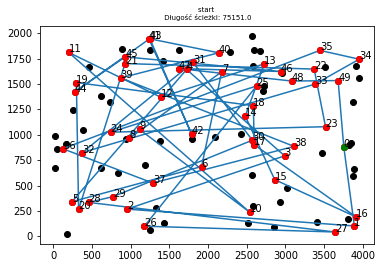

<IPython.core.display.Javascript object>

In [22]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[32, 94, 55, 96, 3, 64, 65, 15, 52, 16, 14, 22, 76, 50, 24, 39, 80, 72, 67, 84, 45, 28, 13, 40, 42, 98, 37, 23, 89, 62, 46, 97, 59, 11, 54, 56, 86, 92, 66, 79, 7, 5, 71, 73, 20, 90, 33, 29, 95, 75]
[32, 94, 55, 96, 3, 64, 65, 15, 52, 16, 14, 22, 76, 50, 24, 39, 80, 72, 67, 84, 45, 28, 13, 40, 42, 98, 37, 23, 89, 62, 46, 97, 59, 11, 54, 56, 86, 92, 66, 79, 7, 5, 71, 73, 20, 90, 33, 29, 95, 75]


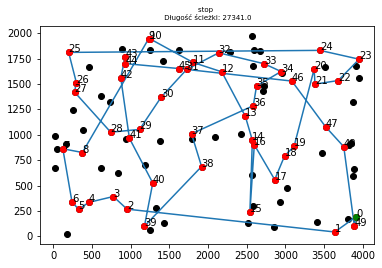

<IPython.core.display.Javascript object>

In [23]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [24]:
def find_lowest_cost_inner_steepest(possible_moves, path, distance_matrix):
    cost = 99999999999999
    swaps = ()
    for (swap1, swap2) in possible_moves:
        current_cost = calculate_edge_swap_cost((swap1, swap2), path, distance_matrix)
        if current_cost < cost:
            cost = current_cost
            swaps = (swap1, swap2)

    return cost, swaps


@timing
def inner_vertex_steepest(path, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves = create_combs(path)
        cost, swaps = find_lowest_cost_inner_steepest(
            possible_moves, path, distance_matrix
        )
        if cost < 0:
            swap1, swap2 = swaps
            swap_items_in_path((swap1, swap2), path)
            better = True

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_vertex_steepest(path, distance_matrix2)

Elapsed time: 1.9036214351654053


<IPython.core.display.Javascript object>

[52, 67, 0, 7, 37, 61, 46, 98, 85, 89, 38, 20, 95, 19, 45, 62, 49, 31, 18, 43, 4, 92, 28, 50, 57, 79, 72, 39, 33, 11, 23, 35, 76, 74, 56, 48, 97, 8, 93, 59, 51, 63, 65, 14, 82, 22, 2, 6, 99, 58]
[52, 67, 0, 7, 37, 61, 46, 98, 85, 89, 38, 20, 95, 19, 45, 62, 49, 31, 18, 43, 4, 92, 28, 50, 57, 79, 72, 39, 33, 11, 23, 35, 76, 74, 56, 48, 97, 8, 93, 59, 51, 63, 65, 14, 82, 22, 2, 6, 99, 58]


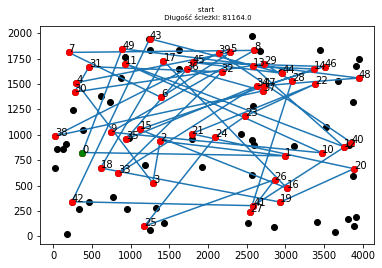

<IPython.core.display.Javascript object>

In [25]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[89, 18, 52, 65, 93, 23, 37, 98, 35, 48, 62, 0, 74, 79, 7, 92, 57, 50, 99, 51, 4, 95, 38, 67, 63, 39, 43, 49, 72, 46, 31, 97, 22, 59, 76, 61, 19, 56, 6, 8, 82, 33, 28, 2, 45, 11, 85, 14, 20, 58]
[89, 18, 52, 65, 93, 23, 37, 98, 35, 48, 62, 0, 74, 79, 7, 92, 57, 50, 99, 51, 4, 95, 38, 67, 63, 39, 43, 49, 72, 46, 31, 97, 22, 59, 76, 61, 19, 56, 6, 8, 82, 33, 28, 2, 45, 11, 85, 14, 20, 58]


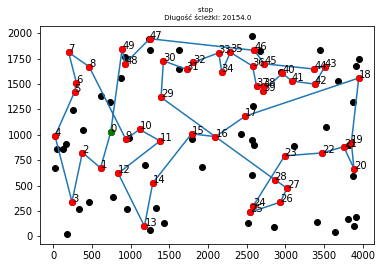

<IPython.core.display.Javascript object>

In [26]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [27]:
import itertools
def create_combs_between_two_lists(list1, list2):
    return list(itertools.product(list1, list2))

def calculate_edge_swap_cost_outer(swaps, path, distance_matrix):
    swap1, swap2, = swaps
    neighs = get_neighs(swap1, path)
    before_cost = edge_length(swap1, neighs, distance_matrix)
    after_cost = edge_length(swap2, neighs, distance_matrix)
    return after_cost - before_cost

def swap_item_value_in_list(swaps, path):
    swap1, swap2 = swaps
    index1 = path.index(swap1)
    path[index1]= swap2


<IPython.core.display.Javascript object>

In [28]:
@timing
def outer_vertex_greedy(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves = create_combs_between_two_lists(path, rest)
        random.shuffle(possible_moves)
        for (swap1, swap2) in possible_moves:
            cost = calculate_edge_swap_cost_outer((swap1, swap2), path, distance_matrix)
            if cost < 0:
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True
                break
    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_greedy(path, rest, distance_matrix2)

stop [27, 57, 68, 63, 43, 49, 72, 39, 53, 7, 91, 10, 16, 14, 31, 90, 97, 22, 76, 8, 6, 19, 56, 82, 54, 26, 11, 28, 45, 33, 50, 24, 86, 67, 80, 84, 38, 36, 4, 77, 95, 60, 92, 0, 5, 48, 9, 89, 62, 46]
Elapsed time: 0.3947737216949463


<IPython.core.display.Javascript object>

[78, 72, 80, 8, 27, 94, 53, 57, 70, 37, 91, 12, 19, 59, 11, 73, 25, 18, 35, 61, 46, 13, 42, 93, 44, 38, 60, 47, 20, 29, 50, 34, 41, 55, 49, 31, 95, 45, 86, 77, 75, 74, 2, 66, 76, 30, 0, 36, 87, 97]
[78, 72, 80, 8, 27, 94, 53, 57, 70, 37, 91, 12, 19, 59, 11, 73, 25, 18, 35, 61, 46, 13, 42, 93, 44, 38, 60, 47, 20, 29, 50, 34, 41, 55, 49, 31, 95, 45, 86, 77, 75, 74, 2, 66, 76, 30, 0, 36, 87, 97]


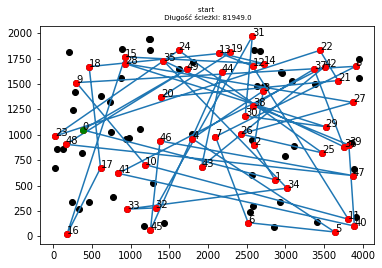

<IPython.core.display.Javascript object>

In [29]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[27, 57, 68, 63, 43, 49, 72, 39, 53, 7, 91, 10, 16, 14, 31, 90, 97, 22, 76, 8, 6, 19, 56, 82, 54, 26, 11, 28, 45, 33, 50, 24, 86, 67, 80, 84, 38, 36, 4, 77, 95, 60, 92, 0, 5, 48, 9, 89, 62, 46]
[27, 57, 68, 63, 43, 49, 72, 39, 53, 7, 91, 10, 16, 14, 31, 90, 97, 22, 76, 8, 6, 19, 56, 82, 54, 26, 11, 28, 45, 33, 50, 24, 86, 67, 80, 84, 38, 36, 4, 77, 95, 60, 92, 0, 5, 48, 9, 89, 62, 46]


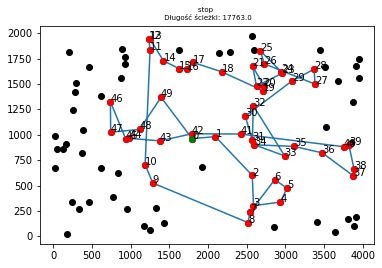

<IPython.core.display.Javascript object>

In [30]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [31]:
def edge_length_numpy(point, neighs, distance_matrix):
    new_length = distance_matrix[point, list(neighs)].sum()
    return new_length


def calculate_edge_swap_cost_outer_numpy(swaps, path, distance_matrix):
    (
        swap1,
        swap2,
    ) = swaps
    neighs = get_neighs(swap1, path)
    before_cost = edge_length_numpy(swap1, neighs, distance_matrix)
    #zwroc after_cost edges
    after_cost = edge_length_numpy(swap2, neighs, distance_matrix)
    return after_cost - before_cost


def find_lowest_cost_outer_steepest(possible_moves, path, distance_matrix):
    cost = 99999999999999
    swaps = ()
    for (swap1, swap2) in possible_moves:
        current_cost = calculate_edge_swap_cost_outer_numpy(
            (swap1, swap2), path, distance_matrix
        )
        if current_cost < cost:
            cost = current_cost
            swaps = (swap1, swap2)

    return cost, swaps


@timing
def outer_vertex_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves = create_combs_between_two_lists(path, rest)
        cost, swaps = find_lowest_cost_outer_steepest(
            possible_moves, path, distance_matrix
        )
        if cost < 0:
            swap1, swap2 = swaps
            swap_item_value_in_list((swap1, swap2), path)
            swap_item_value_in_list((swap2, swap1), rest)
            better = True
    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_steepest(path, rest, distance_matrix2)

stop [97, 82, 54, 61, 59, 14, 16, 10, 90, 19, 11, 56, 31, 20, 9, 48, 62, 0, 66, 60, 50, 26, 85, 34, 76, 22, 44, 46, 57, 86, 8, 6, 67, 72, 68, 92, 27, 96, 3, 18, 5, 91, 7, 41, 55, 74, 78, 17, 83, 71]
Elapsed time: 1.5518639087677002


<IPython.core.display.Javascript object>

[26, 86, 32, 78, 28, 39, 16, 81, 90, 19, 43, 56, 31, 45, 9, 94, 21, 92, 30, 63, 50, 44, 15, 34, 12, 91, 93, 83, 40, 60, 8, 64, 0, 1, 71, 80, 27, 67, 3, 14, 47, 48, 49, 41, 52, 74, 22, 17, 87, 58]
[26, 86, 32, 78, 28, 39, 16, 81, 90, 19, 43, 56, 31, 45, 9, 94, 21, 92, 30, 63, 50, 44, 15, 34, 12, 91, 93, 83, 40, 60, 8, 64, 0, 1, 71, 80, 27, 67, 3, 14, 47, 48, 49, 41, 52, 74, 22, 17, 87, 58]


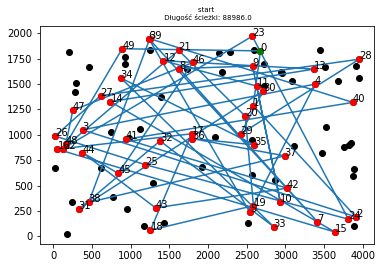

<IPython.core.display.Javascript object>

In [32]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[97, 82, 54, 61, 59, 14, 16, 10, 90, 19, 11, 56, 31, 20, 9, 48, 62, 0, 66, 60, 50, 26, 85, 34, 76, 22, 44, 46, 57, 86, 8, 6, 67, 72, 68, 92, 27, 96, 3, 18, 5, 91, 7, 41, 55, 74, 78, 17, 83, 71]
[97, 82, 54, 61, 59, 14, 16, 10, 90, 19, 11, 56, 31, 20, 9, 48, 62, 0, 66, 60, 50, 26, 85, 34, 76, 22, 44, 46, 57, 86, 8, 6, 67, 72, 68, 92, 27, 96, 3, 18, 5, 91, 7, 41, 55, 74, 78, 17, 83, 71]


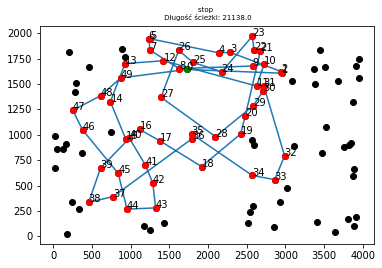

<IPython.core.display.Javascript object>

In [33]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [132]:
%reload_ext nb_black


def edge_length_numpy(point, neigh, dm):
    new_length = dm[point, neigh].sum()
    return new_length


def get_edges(path):
    return [[path[d - 1], vertex] for d, vertex in enumerate(path)]


def get_edges_except(path):
    e = get_edges(path)
    return [
        item
        for item in itertools.combinations(e, 2)
        if len(set(itertools.chain(*item))) == 4
    ]


# print(get_edges([1,2,3]))


def swap_items_in_path(swaps, path):
    swap1, swap2 = swaps
    index1 = path.index(swap1)
    index2 = path.index(swap2)
    path[index1], path[index2] = path[index2], path[index1]


def reverse_part_of_list(swap1, swap2, path):
    index_swap1 = path.index(swap1)
    index_swap2 = path.index(swap2)
    ix_min = index_swap1 if index_swap1 < index_swap2 else index_swap2
    ix_max = index_swap1 if index_swap1 > index_swap2 else index_swap2
    path[int(ix_min + 1) : ix_max] = path[int(ix_min + 1) : ix_max][::-1]


def calculate_cost_edge_greedy(edge1, edge2, distance_matrix):
    swap1_0 = edge1[0]
    swap1_1 = edge1[1]
    swap2_0 = edge2[0]
    swap2_1 = edge2[1]
    edge1_length = edge_length_numpy(swap1_0, swap1_1, distance_matrix)
    edge2_length = edge_length_numpy(swap2_0, swap2_1, distance_matrix)
    new_edge1_length = edge_length_numpy(swap1_0, swap2_0, distance_matrix)
    new_edge2_length = edge_length_numpy(swap1_1, swap2_1, distance_matrix)
    # dodaj zwracanie new edges
    cost = new_edge1_length + new_edge2_length - edge1_length - edge2_length
    return cost, swap1_1, swap2_0


@timing
def inner_edge_greedy(path, distance_matrix):
    better = True
    start_path = path.copy()
    print("start", path)
    while better:
        better = False
        edges = get_edges_except(path)
        random.shuffle(edges)
        for (edge1, edge2) in edges:
            cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
                edge1, edge2, distance_matrix
            )

            if cost < 0:
                swap_items_in_path((swap1_1, swap2_0), path)
                reverse_part_of_list(swap1_1, swap2_0, path)
                better = True
                break

    print("stop", path)
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_edge_greedy(path, distance_matrix2)

start [72, 24, 53, 8, 14, 42, 46, 90, 36, 86, 62, 39, 15, 54, 88, 77, 70, 93, 7, 25, 34, 17, 85, 12, 50, 45, 37, 76, 67, 51, 20, 97, 48, 80, 81, 23, 68, 3, 13, 40, 52, 47, 95, 22, 5, 94, 28, 11, 66, 82]
stop [54, 11, 85, 34, 76, 22, 97, 90, 14, 46, 62, 5, 48, 20, 37, 23, 17, 93, 15, 52, 25, 3, 7, 88, 66, 53, 39, 72, 68, 80, 24, 50, 86, 8, 67, 81, 94, 12, 36, 95, 77, 51, 47, 13, 70, 40, 42, 45, 28, 82]
Elapsed time: 0.21388721466064453


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[1, 96, 84, 74, 78, 70, 40, 87, 12, 53, 69, 15, 0, 82, 48, 18, 52, 80, 99, 3, 54, 28, 65, 86, 17, 62, 75, 61, 56, 68, 30, 9, 44, 60, 46, 51, 83, 92, 31, 35, 79, 19, 76, 50, 58, 21, 7, 41, 20, 43]
[1, 96, 84, 74, 78, 70, 40, 87, 12, 53, 69, 15, 0, 82, 48, 18, 52, 80, 99, 3, 54, 28, 65, 86, 17, 62, 75, 61, 56, 68, 30, 9, 44, 60, 46, 51, 83, 92, 31, 35, 79, 19, 76, 50, 58, 21, 7, 41, 20, 43]


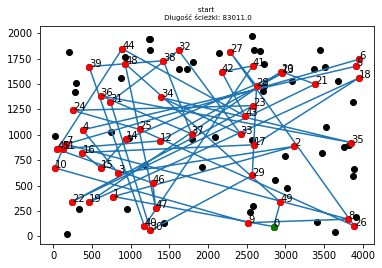

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[12, 75, 51, 99, 40, 70, 28, 82, 54, 19, 61, 76, 56, 86, 84, 80, 60, 50, 92, 44, 31, 58, 20, 46, 0, 62, 48, 9, 83, 35, 17, 78, 18, 52, 87, 15, 21, 69, 65, 3, 96, 74, 7, 79, 30, 41, 68, 53, 1, 43]
[12, 75, 51, 99, 40, 70, 28, 82, 54, 19, 61, 76, 56, 86, 84, 80, 60, 50, 92, 44, 31, 58, 20, 46, 0, 62, 48, 9, 83, 35, 17, 78, 18, 52, 87, 15, 21, 69, 65, 3, 96, 74, 7, 79, 30, 41, 68, 53, 1, 43]


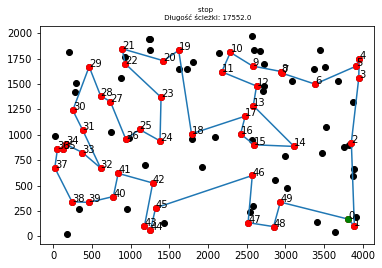

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [37]:
%reload_ext nb_black


def find_lowest_cost_edge(edges, path, distance_matrix):
    cost = 99999999999999
    swaps = ()
    for (edge1, edge2) in edges:
        current_cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
            edge1, edge2, distance_matrix
        )
        if current_cost < cost:
            cost = current_cost
            swaps = (swap1_1, swap2_0)

    return cost, swaps


@timing
def inner_edge_steepest(path, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        edges = get_edges_except(path)
        cost, (swap1_1, swap2_0) = find_lowest_cost_edge(edges, path, distance_matrix)
        if cost < 0:
            swap_items_in_path((swap1_1, swap2_0), path)
            reverse_part_of_list(swap1_1, swap2_0, path)
            better = True

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_edge_steepest(path, distance_matrix2)

Elapsed time: 0.8152246475219727


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[92, 42, 86, 53, 39, 23, 62, 15, 32, 3, 9, 4, 52, 64, 99, 27, 72, 5, 28, 30, 87, 38, 63, 40, 84, 51, 13, 59, 24, 20, 16, 26, 55, 37, 46, 25, 90, 66, 45, 94, 60, 6, 29, 68, 69, 2, 80, 77, 96, 78]
[92, 42, 86, 53, 39, 23, 62, 15, 32, 3, 9, 4, 52, 64, 99, 27, 72, 5, 28, 30, 87, 38, 63, 40, 84, 51, 13, 59, 24, 20, 16, 26, 55, 37, 46, 25, 90, 66, 45, 94, 60, 6, 29, 68, 69, 2, 80, 77, 96, 78]


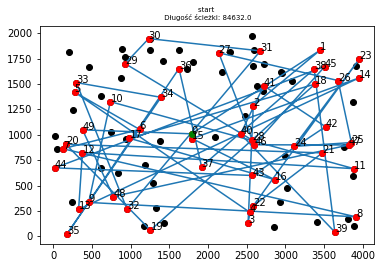

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[23, 37, 9, 20, 16, 90, 59, 26, 6, 86, 60, 24, 80, 68, 72, 84, 29, 28, 45, 42, 2, 13, 40, 99, 51, 77, 38, 4, 32, 94, 53, 39, 63, 66, 27, 92, 46, 62, 5, 30, 55, 96, 3, 64, 25, 69, 15, 87, 52, 78]
[23, 37, 9, 20, 16, 90, 59, 26, 6, 86, 60, 24, 80, 68, 72, 84, 29, 28, 45, 42, 2, 13, 40, 99, 51, 77, 38, 4, 32, 94, 53, 39, 63, 66, 27, 92, 46, 62, 5, 30, 55, 96, 3, 64, 25, 69, 15, 87, 52, 78]


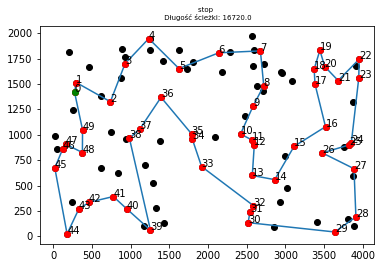

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [40]:
@timing
def hehe(num):
    for _ in range(num):
        pass
    return [1, 2]


hehe(100000)

Elapsed time: 0.00099945068359375


(1, 2, 0.00099945068359375)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
# inner_and_outer_vertex_greedy greedy
@timing
def inner_and_outer_vertex_greedy(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves_inner = create_combs(path)
        possible_moves_outer = create_combs_between_two_lists(path, rest)
        all_combined = possible_moves_inner + possible_moves_outer
        random.shuffle(all_combined)

        for item in all_combined:
            if item in possible_moves_inner:
                (swap1, swap2) = item
                cost = calculate_edge_swap_cost((swap1, swap2), path, distance_matrix)
                if cost < 0:
                    swap_items_in_path((swap1, swap2), path)
                    better = True
                    break
            if item in possible_moves_outer:
                (swap1, swap2) = item
                cost = calculate_edge_swap_cost_outer(
                    (swap1, swap2), path, distance_matrix
                )
                if cost < 0:
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True
                    break
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_and_outer_vertex_greedy(
    path, rest, distance_matrix2
)

Elapsed time: 2.752795934677124


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[44, 83, 8, 6, 67, 60, 78, 89, 94, 66, 0, 9, 12, 95, 61, 93, 49, 48, 1, 86, 47, 37, 23, 90, 52, 21, 27, 80, 3, 68, 33, 58, 5, 2, 82, 81, 74, 88, 35, 4, 55, 63, 42, 36, 51, 79, 28, 75, 59, 7]
[44, 83, 8, 6, 67, 60, 78, 89, 94, 66, 0, 9, 12, 95, 61, 93, 49, 48, 1, 86, 47, 37, 23, 90, 52, 21, 27, 80, 3, 68, 33, 58, 5, 2, 82, 81, 74, 88, 35, 4, 55, 63, 42, 36, 51, 79, 28, 75, 59, 7]


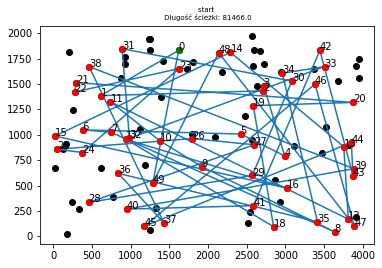

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[61, 34, 26, 85, 19, 76, 46, 62, 5, 9, 71, 20, 73, 10, 31, 44, 60, 80, 24, 66, 91, 74, 96, 18, 52, 78, 89, 48, 0, 92, 57, 27, 7, 41, 79, 30, 88, 86, 8, 6, 82, 33, 29, 38, 84, 50, 97, 90, 22, 59]
[61, 34, 26, 85, 19, 76, 46, 62, 5, 9, 71, 20, 73, 10, 31, 44, 60, 80, 24, 66, 91, 74, 96, 18, 52, 78, 89, 48, 0, 92, 57, 27, 7, 41, 79, 30, 88, 86, 8, 6, 82, 33, 29, 38, 84, 50, 97, 90, 22, 59]


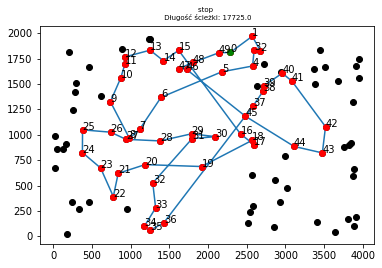

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

# inner_and_outer_vertex_steepest steepest
@timing
def inner_and_outer_vertex_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        choice = random.getrandbits(1)

        if choice == 0:
            possible_moves = create_combs(path)
            cost, swaps = find_lowest_cost(possible_moves, path, distance_matrix)
            if cost < 0:
                swap1, swap2 = swaps
                swap_items_in_path((swap1, swap2), path)
                better = True
        if choice == 1:
            possible_moves = create_combs_between_two_lists(path, rest)
            cost, swaps = find_lowest_cost(possible_moves, path, distance_matrix)
            if cost < 0:
                swap1, swap2 = swaps
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_and_outer_vertex_steepest(
    path, rest, distance_matrix2
)

In [44]:
# inner_and_outer_vertex_steepest steepest
@timing
def inner_and_outer_vertex_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves_inner = create_combs(path)
        cost_inner, swaps_inner = find_lowest_cost_inner_steepest(
            possible_moves_inner, path, distance_matrix
        )

        possible_moves_outer = create_combs_between_two_lists(path, rest)
        cost_outer, swaps_outer = find_lowest_cost_outer_steepest(
            possible_moves_outer, path, distance_matrix
        )

        if cost_inner < cost_outer and cost_inner < 0:
            swap1, swap2 = swaps_inner
            swap_items_in_path((swap1, swap2), path)
            better = True

        if cost_outer <= cost_inner and cost_outer < 0:
            swap1, swap2 = swaps_outer
            swap_item_value_in_list((swap1, swap2), path)
            swap_item_value_in_list((swap2, swap1), rest)
            better = True

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = inner_and_outer_vertex_steepest(
    path, rest, distance_matrix2
)

Elapsed time: 6.319726467132568


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[1, 12, 17, 65, 19, 6, 31, 11, 61, 53, 41, 62, 76, 78, 82, 92, 99, 30, 2, 77, 23, 18, 40, 5, 0, 55, 56, 70, 52, 25, 93, 95, 3, 60, 84, 47, 80, 58, 73, 74, 79, 88, 32, 96, 46, 90, 81, 69, 94, 51]
[1, 12, 17, 65, 19, 6, 31, 11, 61, 53, 41, 62, 76, 78, 82, 92, 99, 30, 2, 77, 23, 18, 40, 5, 0, 55, 56, 70, 52, 25, 93, 95, 3, 60, 84, 47, 80, 58, 73, 74, 79, 88, 32, 96, 46, 90, 81, 69, 94, 51]


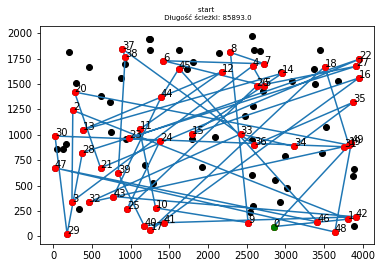

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[27, 92, 90, 97, 22, 56, 6, 19, 61, 76, 60, 50, 86, 8, 82, 54, 2, 45, 28, 33, 62, 5, 48, 74, 96, 18, 52, 15, 21, 93, 87, 78, 83, 71, 20, 73, 58, 46, 0, 7, 41, 30, 79, 88, 66, 80, 24, 67, 72, 68]
[27, 92, 90, 97, 22, 56, 6, 19, 61, 76, 60, 50, 86, 8, 82, 54, 2, 45, 28, 33, 62, 5, 48, 74, 96, 18, 52, 15, 21, 93, 87, 78, 83, 71, 20, 73, 58, 46, 0, 7, 41, 30, 79, 88, 66, 80, 24, 67, 72, 68]


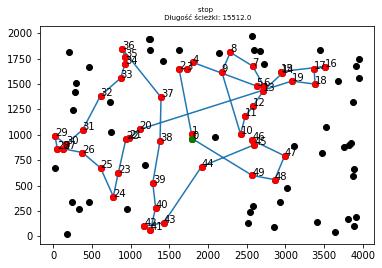

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

# outer vertex inner edge
@timing
def outer_vertex_inner_edge_greedy(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        choice = random.getrandbits(1)

        if choice == 0:
            possible_moves = create_combs_between_two_lists(path, rest)
            random.shuffle(possible_moves)
            for (swap1, swap2) in possible_moves:
                cost = calculate_edge_swap_cost_outer(
                    (swap1, swap2), path, distance_matrix
                )
                if cost < 0:
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True
                    break
        if choice == 1:
            edges = get_edges_except(path)
            random.shuffle(edges)
            for (edge1, edge2) in edges:
                cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
                    edge1, edge2, distance_matrix
                )

                if cost < 0:
                    swap_items_in_path((swap1_1, swap2_0), path)
                    reverse_part_of_list(swap1_1, swap2_0, path)
                    better = True
                    break
    return start_path, path


print()
e = [([4, 1], [2, 3])]
z = get_edges_except([1, 2, 3, 4])[0]
if (4, 1) in e:
    print(z)
path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_greedy(
    path, rest, distance_matrix2
)

In [47]:
# outer vertex inner edge
@timing
def outer_vertex_inner_edge_greedy(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False

        possible_moves = create_combs_between_two_lists(path, rest)
        edges = get_edges_except(path)
        all_combined = possible_moves + edges
        random.shuffle(all_combined)

        for item in all_combined:
            if item in possible_moves:
                (swap1, swap2) = item
                cost = calculate_edge_swap_cost_outer(
                    (swap1, swap2), path, distance_matrix
                )
                if cost < 0:
                    swap_item_value_in_list((swap1, swap2), path)
                    swap_item_value_in_list((swap2, swap1), rest)
                    better = True
                    break
            if item in edges:
                (edge1, edge2) = item
                cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
                    edge1, edge2, distance_matrix
                )

                if cost < 0:
                    swap_items_in_path((swap1_1, swap2_0), path)
                    reverse_part_of_list(swap1_1, swap2_0, path)
                    better = True
                    break

    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_greedy(
    path, rest, distance_matrix2
)

Elapsed time: 2.73293137550354


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[25, 21, 33, 8, 39, 28, 40, 83, 0, 74, 16, 55, 24, 58, 23, 91, 71, 36, 45, 38, 50, 49, 26, 82, 11, 68, 1, 10, 93, 4, 81, 96, 98, 30, 84, 7, 70, 92, 89, 60, 35, 72, 44, 64, 43, 63, 17, 78, 97, 54]
[25, 21, 33, 8, 39, 28, 40, 83, 0, 74, 16, 55, 24, 58, 23, 91, 71, 36, 45, 38, 50, 49, 26, 82, 11, 68, 1, 10, 93, 4, 81, 96, 98, 30, 84, 7, 70, 92, 89, 60, 35, 72, 44, 64, 43, 63, 17, 78, 97, 54]


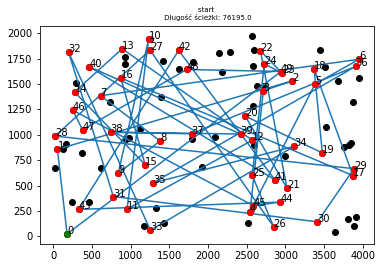

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[82, 33, 45, 42, 2, 28, 84, 67, 72, 68, 66, 7, 41, 79, 55, 96, 74, 5, 48, 89, 52, 78, 17, 83, 9, 71, 20, 73, 58, 46, 92, 27, 57, 50, 86, 76, 97, 90, 22, 59, 61, 34, 85, 26, 11, 19, 56, 8, 6, 54]
[82, 33, 45, 42, 2, 28, 84, 67, 72, 68, 66, 7, 41, 79, 55, 96, 74, 5, 48, 89, 52, 78, 17, 83, 9, 71, 20, 73, 58, 46, 92, 27, 57, 50, 86, 76, 97, 90, 22, 59, 61, 34, 85, 26, 11, 19, 56, 8, 6, 54]


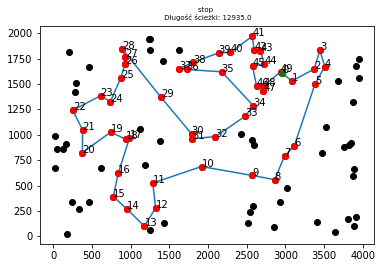

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [50]:
# outer vertex inner edge
@timing
def outer_vertex_inner_edge_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    while better:
        better = False
        possible_moves_outer = create_combs_between_two_lists(path, rest)
        cost_outer, swaps_outer = find_lowest_cost_outer_steepest(possible_moves_outer, path, distance_matrix)
        
        edges = get_edges_except(path)
        cost_edges, swaps_edge  = find_lowest_cost_edge(
            edges, path, distance_matrix
        )
            
        if cost_outer < cost_edges and cost_outer < 0:
            swap1, swap2 = swaps_outer
            swap_item_value_in_list((swap1, swap2), path)
            swap_item_value_in_list((swap2, swap1), rest)
            better = True
            
        if cost_edges <= cost_outer and cost_edges < 0:
            (swap1_1, swap2_0) = swaps_edge
            swap_items_in_path((swap1_1, swap2_0), path)
            reverse_part_of_list(swap1_1, swap2_0, path)
            better = True
            
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa100)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)


Elapsed time: 3.214017391204834


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[47, 56, 9, 26, 71, 39, 37, 30, 15, 79, 3, 14, 86, 52, 6, 34, 46, 42, 29, 43, 80, 35, 40, 24, 53, 72, 4, 23, 89, 81, 0, 20, 67, 2, 22, 38, 90, 51, 50, 91, 12, 63, 96, 60, 83, 64, 68, 70, 21, 55]
[47, 56, 9, 26, 71, 39, 37, 30, 15, 79, 3, 14, 86, 52, 6, 34, 46, 42, 29, 43, 80, 35, 40, 24, 53, 72, 4, 23, 89, 81, 0, 20, 67, 2, 22, 38, 90, 51, 50, 91, 12, 63, 96, 60, 83, 64, 68, 70, 21, 55]


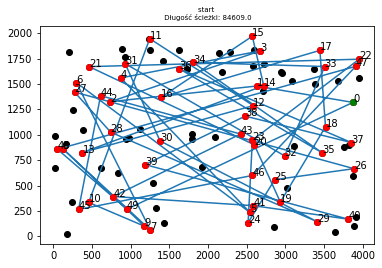

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
a = create_plot(start_path, lat, lon, "start", distance_matrix)

[96, 74, 7, 91, 48, 89, 87, 15, 21, 17, 23, 37, 35, 20, 31, 90, 22, 59, 61, 19, 11, 56, 6, 8, 86, 50, 24, 80, 72, 67, 84, 29, 13, 70, 99, 47, 51, 77, 95, 4, 36, 38, 49, 43, 1, 63, 39, 88, 79, 55]
[96, 74, 7, 91, 48, 89, 87, 15, 21, 17, 23, 37, 35, 20, 31, 90, 22, 59, 61, 19, 11, 56, 6, 8, 86, 50, 24, 80, 72, 67, 84, 29, 13, 70, 99, 47, 51, 77, 95, 4, 36, 38, 49, 43, 1, 63, 39, 88, 79, 55]


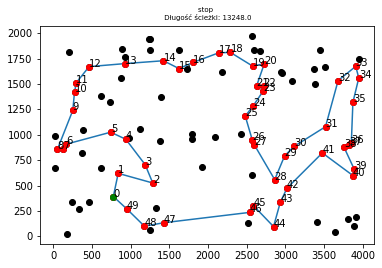

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

In [53]:
@timing
def random_solution(path, time, distance_matrix):
    from datetime import datetime, timedelta

    to_return = []
    path_len = 999999999999999
    end_time = datetime.now() + timedelta(seconds=time)
    while datetime.now() < end_time:
        full_path = path + [path[0]]
        curr_len = calculate_path_length(full_path, distance_matrix)
        if curr_len < path_len:
            path_len = curr_len
            to_return = path
        random.shuffle(path)

    return to_return, path_len

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# with open("paths.txt", "r") as file:
#     data = file.readlines()


# def testtest(program, time, title):
#     final_scores = []

#     for ix, items in enumerate(data):
#         path = [int(item) for item in items.split()]
#         lat, lon = get_lat_lon_from_url(target_url=target_url_krob100)
#         distance_matrix = calc_matrix(lat, lon)
#         stop_path, lengh, diff = program(path, time, distance_matrix)
#         final_path = stop_path + [stop_path[0]]
#         path_len = calculate_path_length(final_path, distance_matrix)

#         scores = [diff, path_len, final_path]
#         final_scores.append(scores)
#     df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])
#     df["Time"] = df["Time"].astype("float")
#     df["PathLen"] = df["PathLen"].astype("float")
#     df["FinalPath"] = df["FinalPath"].astype("object")
#     display(df)
#     display(df.describe())
#     df.to_csv(title)
#     return True

# testtest(random_solution, 4.61, "randomsolb")
# c = pd.read_csv("randomsolb")
# display(c[c["PathLen"] == c["PathLen"].min()])
# display(c.describe())
with open("paths.txt", "r") as file:
    data = file.readlines()


def test(program, title):
    final_scores = []

    for ix, items in enumerate(data):
        path = [int(item) for item in items.split()]
        rest = list(set([i for i in range(100)]) - set(path))
        print(ix, path)
        lat, lon = get_lat_lon_from_url(target_url=target_url_krob100)
        distance_matrix = calc_matrix(lat, lon)
        distance_matrix2 = distance_matrix.to_numpy()
        start_path, stop_path, diff = program(path, rest, distance_matrix2)
        final_path = stop_path + [stop_path[0]]
        path_len = calculate_path_length(final_path, distance_matrix)
        scores = [diff, path_len, final_path]
        final_scores.append(scores)
    df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])
    df["Time"] = df["Time"].astype("float")
    df["PathLen"] = df["PathLen"].astype("float")
    df["FinalPath"] = df["FinalPath"].astype("object")
    display(df)
    display(df.describe())
    df.to_csv(title)
    return True


kroa
test(inner_and_outer_vertex_steepest, "test")
test(outer_vertex_inner_edge_steepest, "outer_vertex_inner_edge_steepestkrob")
test(inner_and_outer_vertex_steepest, "inner_and_outer_vertex_steepestkrob")
test(inner_and_outer_vertex_greedy, "inner_and_outer_vertex_greedykrob")
test(outer_vertex_inner_edge_greedy, "outer_vertex_inner_edge_greedykrob")
c = pd.read_csv("inner_and_outer_vertex_greedykrob")


In [67]:
import operator
from itertools import chain

def create_steepest_ranking_outer_vertex(possible_moves_outer, path,rest, distance_matrix):
    ranking = []
    for (swap1, swap2) in possible_moves_outer:
        current_cost = calculate_edge_swap_cost_outer_numpy(
            (swap1, swap2), path, distance_matrix
        )
        if current_cost < 0:
            p = get_neighs(swap1, path)
            r = get_neighs(swap2,rest)
            n = [p, r, (swap1, swap2)]
            to_delete = list(set(list(chain(*n))))
            l = ["vertex", (swap1, swap2), current_cost, to_delete]
            ranking.append(l)

    return ranking

def create_steepest_ranking_edge(edges, path, distance_matrix):
    ranking = []
    for (edge1, edge2) in edges:
        current_cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
            edge1, edge2, distance_matrix
        )
        if current_cost < 0:
            a = get_neighs(edge1[0], path)
            b = get_neighs(edge1[1], path)
            c = get_neighs(edge2[0], path)
            d = get_neighs(edge2[1], path)
            n = [a,b,c,d]
            to_delete = list(set(list(chain(*n))))
            l = ["edge", (swap1_1, swap2_0), current_cost, to_delete]
            ranking.append(l)

    return ranking


# outer vertex inner edge
@timing
def new_outer_vertex_inner_edge_steepest(path, rest, distance_matrix):
    better = True
    start_path = path.copy()
    
    whole_ranking = []
    while better:
        better = False
        possible_moves_outer = create_combs_between_two_lists(path, rest)        
        edges = get_edges_except(path)
        
        existing_moves_vertex = [item[1] for item in whole_ranking if item[0] == "vertex"]
        existing_moves_edge = [item[1] for item in whole_ranking if item[0] == "edge"]
        
        new_possible_moves_outer = [item for item in possible_moves_outer if item not in existing_moves_vertex]
        new_edges = [item for item in edges if item not in existing_moves_edge]
        
        vertex_ranking = create_steepest_ranking_outer_vertex(new_possible_moves_outer, path, rest, distance_matrix)
        edge_ranking = create_steepest_ranking_edge(new_edges, path, distance_matrix)
        
        whole_ranking += vertex_ranking
        whole_ranking += edge_ranking
        whole_ranking = sorted(whole_ranking, key=operator.itemgetter(2))   
        
        if len(whole_ranking) > 0:
            _type, swaps, cost, to_delete = whole_ranking[0]

            if _type == "vertex":
                swap1, swap2 = swaps
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True

            if _type == "edge":
                (swap1_1, swap2_0) = swaps
                swap_items_in_path((swap1_1, swap2_0), path)
                reverse_part_of_list(swap1_1, swap2_0, path)
                better = True

            temp = whole_ranking.copy()
            for ix, items in enumerate(whole_ranking):
                for check in items[1]:
                    if check in to_delete:
                        temp.remove(items)
                        break
        
            whole_ranking = temp
        
    return start_path, path


path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = new_outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)


Elapsed time: 4.297597169876099


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[96, 47, 65, 36, 60, 31, 23, 45, 52, 0, 84, 14, 78, 54, 41, 7, 21, 97, 87, 38, 71, 49, 94, 93, 90, 69, 22, 67, 29, 76, 79, 53, 5, 46, 30, 12, 26, 39, 11, 48, 92, 98, 18, 91, 9, 35, 56, 32, 44, 80]
[96, 47, 65, 36, 60, 31, 23, 45, 52, 0, 84, 14, 78, 54, 41, 7, 21, 97, 87, 38, 71, 49, 94, 93, 90, 69, 22, 67, 29, 76, 79, 53, 5, 46, 30, 12, 26, 39, 11, 48, 92, 98, 18, 91, 9, 35, 56, 32, 44, 80]


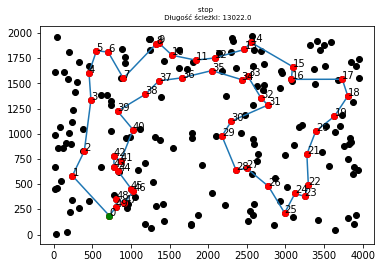

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

Elapsed time: 3.348466634750366
[87, 97, 33, 89, 21, 74, 46, 30, 66, 54, 41, 19, 63, 78, 14, 26, 39, 11, 45, 60, 25, 77, 81, 8, 15, 62, 43, 51, 10, 83, 47, 44, 32, 99, 56, 73, 68, 2, 72, 58, 88, 20, 69, 90, 94, 85, 70, 37, 38, 27]
[87, 97, 33, 89, 21, 74, 46, 30, 66, 54, 41, 19, 63, 78, 14, 26, 39, 11, 45, 60, 25, 77, 81, 8, 15, 62, 43, 51, 10, 83, 47, 44, 32, 99, 56, 73, 68, 2, 72, 58, 88, 20, 69, 90, 94, 85, 70, 37, 38, 27]


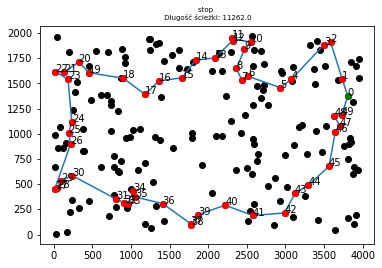

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
path, rest = create_random_vertexes(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

Elapsed time: 157.94079422950745
[2, 76, 29, 67, 168, 22, 172, 149, 90, 94, 85, 195, 177, 151, 55, 70, 129, 138, 49, 167, 184, 61, 74, 182, 154, 106, 108, 53, 128, 145, 102, 113, 97, 199, 170, 57, 33, 89, 24, 16, 111, 119, 126, 185, 41, 54, 19, 63, 161, 159, 78, 14, 122, 144, 0, 52, 110, 45, 171, 48, 17, 109, 28, 183, 36, 137, 8, 81, 47, 83, 10, 51, 169, 121, 193, 50, 62, 187, 43, 65, 118, 91, 9, 174, 196, 44, 32, 99, 56, 13, 191, 100, 59, 107, 68, 188, 40, 88, 58, 72]
[2, 76, 29, 67, 168, 22, 172, 149, 90, 94, 85, 195, 177, 151, 55, 70, 129, 138, 49, 167, 184, 61, 74, 182, 154, 106, 108, 53, 128, 145, 102, 113, 97, 199, 170, 57, 33, 89, 24, 16, 111, 119, 126, 185, 41, 54, 19, 63, 161, 159, 78, 14, 122, 144, 0, 52, 110, 45, 171, 48, 17, 109, 28, 183, 36, 137, 8, 81, 47, 83, 10, 51, 169, 121, 193, 50, 62, 187, 43, 65, 118, 91, 9, 174, 196, 44, 32, 99, 56, 13, 191, 100, 59, 107, 68, 188, 40, 88, 58, 72]


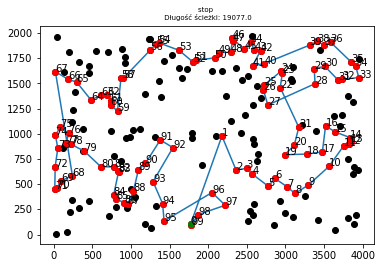

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [178]:
def find_n_closest_neigh(neigh, distance_matrix, k):
    return np.argsort(distance_matrix[:, neigh])[:k]


def get_new_edges_after_vertex_swap(swaps, path):
    (
        swap1,
        swap2,
    ) = swaps
    neighs = get_neighs(swap1, path)
    return [(swap2, neighs[0]), (swap2, neighs[1])]


def get_new_edges_after_edges_swap(swaps):
    edge1, edge2 = swaps
    swap1_0 = edge1[0]
    swap1_1 = edge1[1]
    swap2_0 = edge2[0]
    swap2_1 = edge2[1]
    return [(swap1_0, swap2_0), (swap1_1, swap2_1)]


@timing
def candidate_moves(path, rest, distance_matrix):
    better = True
    start_path = path.copy()

    while better:
        better = False
        possible_moves_outer = create_combs_between_two_lists(path, rest)
        edges = get_edges_except(path)

        possible_moves_outer_new_edges_created = list(
            itertools.chain(
                *[
                    get_new_edges_after_vertex_swap(item, path)
                    for item in possible_moves_outer
                ]
            )
        )
        edges_new_edges_created = list(
            itertools.chain(*[get_new_edges_after_edges_swap(item) for item in edges])
        )

        candidates = []
        for n1 in range(200):
            for n2 in find_n_closest_neigh(n1, distance_matrix, 5):
                if (n1, n2) in edges_new_edges_created:
                    ix = int(edges_new_edges_created.index((n1, n2)) / 2)
                    e = edges[ix]
                    cost, swap1_1, swap2_0 = calculate_cost_edge_greedy(
                        e[0], e[1], distance_matrix
                    )
                    if cost < 0:
                        c = ["edge", (swap1_1, swap2_0), cost]
                        candidates.append(c)
                if (n1, n2) in possible_moves_outer_new_edges_created:
                    ix = int(possible_moves_outer_new_edges_created.index((n1, n2)) / 2)
                    e = possible_moves_outer[ix]
                    cost = calculate_edge_swap_cost_outer_numpy(
                        e, path, distance_matrix
                    )
                    if cost < 0:
                        c = ["vertex", e, cost]
                        candidates.append(c)

        candidates = sorted(candidates, key=operator.itemgetter(2))
        if len(candidates) > 0:
            _type, swaps, cost = candidates[0]

            if _type == "vertex":
                swap1, swap2 = swaps
                swap_item_value_in_list((swap1, swap2), path)
                swap_item_value_in_list((swap2, swap1), rest)
                better = True

            if _type == "edge":
                (swap1_1, swap2_0) = swaps
                swap_items_in_path((swap1_1, swap2_0), path)
                reverse_part_of_list(swap1_1, swap2_0, path)
                better = True

    return start_path, path



def create_random_vertexes2(number_of_samples):
    l = [int(i) for i in range(0, 200)]
    random.shuffle(l)
    vertexes = l[:number_of_samples]
    rest = l[number_of_samples:]
    return vertexes, rest


path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = candidate_moves(path, rest, distance_matrix2)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

Elapsed time: 27.3077290058136
[83, 10, 51, 165, 164, 103, 80, 44, 196, 9, 174, 35, 56, 73, 99, 155, 141, 68, 107, 13, 191, 162, 3, 100, 59, 166, 40, 88, 29, 67, 168, 34, 1, 180, 124, 160, 150, 167, 184, 49, 138, 94, 149, 172, 22, 143, 90, 93, 181, 112, 136, 42, 104, 4, 177, 151, 55, 37, 27, 147, 87, 199, 170, 97, 113, 102, 142, 89, 24, 16, 7, 182, 154, 111, 119, 66, 161, 54, 41, 19, 63, 159, 78, 14, 122, 144, 0, 52, 110, 131, 39, 11, 109, 17, 178, 43, 187, 115, 121, 169]
[83, 10, 51, 165, 164, 103, 80, 44, 196, 9, 174, 35, 56, 73, 99, 155, 141, 68, 107, 13, 191, 162, 3, 100, 59, 166, 40, 88, 29, 67, 168, 34, 1, 180, 124, 160, 150, 167, 184, 49, 138, 94, 149, 172, 22, 143, 90, 93, 181, 112, 136, 42, 104, 4, 177, 151, 55, 37, 27, 147, 87, 199, 170, 97, 113, 102, 142, 89, 24, 16, 7, 182, 154, 111, 119, 66, 161, 54, 41, 19, 63, 159, 78, 14, 122, 144, 0, 52, 110, 131, 39, 11, 109, 17, 178, 43, 187, 115, 121, 169]


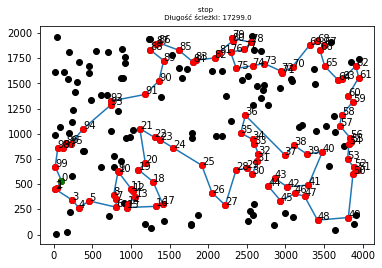

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [180]:
path, rest = create_random_vertexes2(100)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

Elapsed time: 16.777392864227295
[30, 26, 39, 120, 23, 31, 135, 60, 171, 45, 109, 17, 178, 62, 50, 193, 121, 83, 165, 103, 118, 91, 98, 59, 127, 192, 157, 76, 79, 150, 160, 124, 180, 1, 34, 22, 172, 149, 94, 85, 136, 42, 104, 4, 177, 55, 37, 38, 133, 21]
[30, 26, 39, 120, 23, 31, 135, 60, 171, 45, 109, 17, 178, 62, 50, 193, 121, 83, 165, 103, 118, 91, 98, 59, 127, 192, 157, 76, 79, 150, 160, 124, 180, 1, 34, 22, 172, 149, 94, 85, 136, 42, 104, 4, 177, 55, 37, 38, 133, 21]


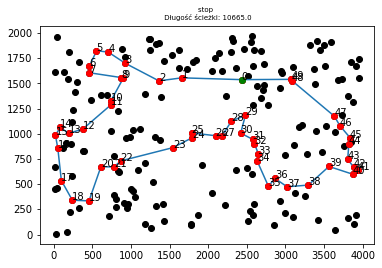

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [136]:
path, rest = create_random_vertexes2(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = new_outer_vertex_inner_edge_steepest(
    path, rest, distance_matrix2
)
a = create_plot(stop_path, lat, lon, "stop", distance_matrix)

Elapsed time: 0.0
[102, 145, 128, 113, 97, 87, 147, 27, 38, 37, 70, 129, 71, 82, 61, 184, 167, 172, 22, 143, 69, 75, 90, 149, 93, 94, 49, 138, 85, 4, 104, 42, 136, 177, 151, 55, 195, 199, 170, 57, 140, 33, 89, 142, 24, 16, 7, 21, 133, 182, 154, 74, 106, 108, 5, 53, 186, 150, 160, 124, 180, 1, 34, 168, 67, 29, 88, 40, 58, 2, 72, 188, 68, 141, 130, 179, 155, 99, 32, 44, 196, 80, 96, 103, 164, 165, 95, 125, 86, 51, 10, 83, 47, 169, 121, 115, 187, 43, 62, 15, 102]
[102, 145, 128, 113, 97, 87, 147, 27, 38, 37, 70, 129, 71, 82, 61, 184, 167, 172, 22, 143, 69, 75, 90, 149, 93, 94, 49, 138, 85, 4, 104, 42, 136, 177, 151, 55, 195, 199, 170, 57, 140, 33, 89, 142, 24, 16, 7, 21, 133, 182, 154, 74, 106, 108, 5, 53, 186, 150, 160, 124, 180, 1, 34, 168, 67, 29, 88, 40, 58, 2, 72, 188, 68, 141, 130, 179, 155, 99, 32, 44, 196, 80, 96, 103, 164, 165, 95, 125, 86, 51, 10, 83, 47, 169, 121, 115, 187, 43, 62, 15, 102]


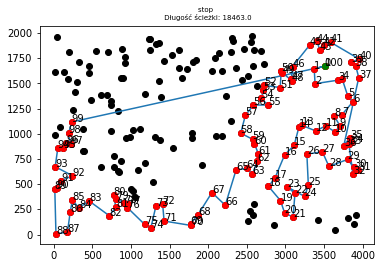

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [179]:
import random

def new_get_clossest_points(distance_matrix, idx):
    num = round(0.5 * distance_matrix.shape[0] - 1)
    return np.argsort(distance_matrix[:, idx])[:num]

@timing
def new_tsp_nn(d, selected_vertex=None):
    if selected_vertex is None:
        selected_vertex = random.randint(0, 199)

    tsp_outcome = [selected_vertex]
    
    for _ in range(int((d.shape[0] / 2) - 1)):
        
        # find minimum in column
        ix_min = int(np.argmin(d[:,selected_vertex]))
        
        # push min to outcome
        tsp_outcome.append(ix_min)
#         test_display.append(tsp_outcome.copy())
        # set distance to 0
        
        d[:, selected_vertex] = np.inf
        d[selected_vertex] = np.inf
        # set vertex as ix_min
        selected_vertex = ix_min

    tsp_outcome.append(tsp_outcome[0])
#     test_display[-1].append(test_display[-1][0])
    return tsp_outcome, 1

path, rest = create_random_vertexes2(50)
lat, lon = get_lat_lon_from_url(target_url=target_url_kroa200)
distance_matrix = calc_matrix(lat, lon)
distance_matrix2 = distance_matrix.to_numpy()
start_path, stop_path, diff = new_tsp_nn(
distance_matrix2
)
distance_matrix = calc_matrix(lat, lon)
a = create_plot(start_path, lat, lon, "stop", distance_matrix)


In [181]:
paths = []
for _ in range(100):
    path, _ = create_random_vertexes2(100)
    if path not in paths:
        paths.append(path)

with open("paths.txt", "w") as file:
    for line in paths[:100]:
        file.write(" ".join([str(i) for i in line]))
        file.write("\n")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [216]:
with open("paths.txt", "r") as file:
    data = file.readlines()


def testzad1(title):
    final_scores = []

    for _ in range(50):
        lat, lon = get_lat_lon_from_url(target_url_krob200)
        distance_matrix = calc_matrix(lat, lon)
        d = distance_matrix.to_numpy()
        #         start = time()
        tsp, d, time = new_tsp_nn(d)
        #         end = time()
        #         diff = end - start
        #         print(tsp)
        final_path = tsp
        distance_matrix = calc_matrix(lat, lon)
        #         display(distance_matrix)
        path_len = calculate_path_length(final_path, distance_matrix)
        scores = [time, path_len, final_path]
        final_scores.append(scores)

    df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])
    df["Time"] = df["Time"].astype("float")
    df["PathLen"] = df["PathLen"].astype("float")
    df["FinalPath"] = df["FinalPath"].astype("object")
    display(df)
    display(df.describe())
    df.to_csv(title)


def test(program, title):
    final_scores = []

    for ix, items in enumerate(data[:5]):
        path = [int(item) for item in items.split()]
        rest = list(set([i for i in range(100)]) - set(path))
        print(ix, path)
        lat, lon = get_lat_lon_from_url(target_url=target_url_krob200)
        distance_matrix = calc_matrix(lat, lon)
        distance_matrix2 = distance_matrix.to_numpy()
        start_path, stop_path, diff = program(path, rest, distance_matrix2)
        final_path = stop_path + [stop_path[0]]
        path_len = calculate_path_length(final_path, distance_matrix)
        scores = [diff, path_len, final_path]
        final_scores.append(scores)
    df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])
    df["Time"] = df["Time"].astype("float")
    df["PathLen"] = df["PathLen"].astype("float")
    df["FinalPath"] = df["FinalPath"].astype("object")
    display(df)
    display(df.describe())
    df.to_csv(title)
    return True


# testzad1("new_tsp_nnkrob200")
# test(outer_vertex_inner_edge_steepest, "outer_vertex_inner_edge_steepestkrob200")
# test(outer_vertex_inner_edge_steepest, "outer_vertex_inner_edge_steepestkrob200")
# test(
#     new_outer_vertex_inner_edge_steepest, "new_outer_vertex_inner_edge_steepestkroa200"
# )
test(candidate_moves, "candidate_moveskrob200")

0 [25, 84, 172, 180, 166, 189, 24, 88, 138, 29, 192, 63, 81, 77, 121, 144, 127, 104, 149, 49, 5, 115, 31, 119, 163, 34, 58, 65, 69, 105, 156, 143, 18, 182, 2, 87, 59, 184, 196, 179, 92, 13, 152, 132, 47, 185, 124, 153, 131, 73, 122, 8, 62, 125, 21, 148, 110, 30, 37, 175, 23, 191, 94, 161, 27, 181, 3, 64, 160, 107, 56, 197, 139, 164, 130, 38, 129, 80, 137, 135, 76, 53, 60, 89, 55, 98, 159, 54, 128, 177, 48, 194, 114, 113, 117, 17, 97, 46, 26, 116]
Elapsed time: 76.07661843299866
1 [113, 141, 84, 182, 184, 161, 116, 83, 59, 14, 82, 58, 177, 138, 107, 71, 171, 51, 178, 196, 24, 42, 9, 172, 136, 132, 56, 3, 128, 45, 127, 35, 12, 28, 192, 95, 139, 47, 34, 143, 120, 69, 64, 119, 163, 6, 126, 33, 187, 104, 114, 140, 72, 112, 25, 40, 0, 167, 199, 110, 88, 109, 31, 86, 156, 22, 186, 102, 36, 170, 91, 185, 19, 147, 77, 63, 27, 149, 152, 67, 123, 131, 134, 90, 87, 66, 44, 30, 193, 157, 57, 160, 154, 68, 80, 137, 54, 99, 97, 144]
Elapsed time: 74.16134405136108
2 [133, 91, 111, 47, 132, 124, 85, 1

<ipython-input-216-b88dafe01719>:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df = pd.DataFrame(np.array(final_scores), columns=["Time", "PathLen", "FinalPath"])


,Time,PathLen,FinalPath
0,76.076618,22258.0,"[39, 38, 148, 69, 72, 121, 84, 48, 85, 137, 31..."
1,74.161344,26848.0,"[65, 132, 73, 6, 83, 57, 19, 37, 2, 128, 90, 9..."
2,63.222734,23246.0,"[59, 56, 93, 179, 8, 24, 145, 116, 38, 169, 52..."
3,69.695501,20043.0,"[136, 18, 91, 118, 44, 35, 40, 191, 16, 77, 15..."
4,79.905239,23480.0,"[93, 179, 60, 34, 62, 125, 186, 191, 40, 147, ..."


,Time,PathLen
count,5.000000,5.000000
mean,72.612287,23175.000000
std,6.408191,2461.671587
min,63.222734,20043.000000
25%,69.695501,22258.000000
50%,74.161344,23246.000000
75%,76.076618,23480.000000
max,79.905239,26848.000000


True

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

       Unnamed: 0       Time       PathLen
count    5.000000   5.000000      5.000000
mean     2.000000  72.612287  23175.000000
std      1.581139   6.408191   2461.671587
min      0.000000  63.222734  20043.000000
25%      1.000000  69.695501  22258.000000
50%      2.000000  74.161344  23246.000000
75%      3.000000  76.076618  23480.000000
max      4.000000  79.905239  26848.000000
   Unnamed: 0       Time  PathLen  \
3           3  69.695501  20043.0   

                                           FinalPath  
3  [136, 18, 91, 118, 44, 35, 40, 191, 16, 77, 15...  

[136, 18, 91, 118, 44, 35, 40, 191, 16, 77, 154, 1, 108, 62, 47, 155, 120, 81, 146, 32, 14, 5, 3, 82, 86, 59, 73, 113, 132, 65, 198, 130, 171, 34, 60, 179, 93, 56, 33, 168, 57, 6, 83, 53, 162, 190, 172, 46, 178, 78, 126, 64, 183, 79, 19, 37, 85, 48, 133, 29, 74, 149, 25, 61, 193, 116, 39, 188, 9, 122, 20, 173, 160, 70, 11, 97, 31, 166, 28, 7, 98, 157, 2, 94, 0, 89, 45, 24, 8, 163, 49, 158, 105, 13, 124, 119, 76, 17, 161, 95

([460,
  387,
  347,
  366,
  422,
  380,
  171,
  240,
  298,
  399,
  401,
  556,
  555,
  193,
  177,
  149,
  386,
  563,
  555,
  731,
  706,
  962,
  1182,
  1090,
  1526,
  1729,
  1794,
  1623,
  1646,
  1697,
  1994,
  2050,
  2374,
  2426,
  2408,
  2221,
  2191,
  2132,
  2312,
  2223,
  2000,
  2030,
  2009,
  1829,
  1819,
  1766,
  1962,
  2372,
  2581,
  2614,
  2658,
  2503,
  2334,
  2800,
  2801,
  2830,
  3084,
  3084,
  2993,
  2938,
  2929,
  3062,
  3123,
  3292,
  3503,
  3600,
  3684,
  3642,
  3438,
  3332,
  3133,
  3007,
  2834,
  2741,
  2937,
  3114,
  3245,
  3248,
  3417,
  3507,
  3515,
  3805,
  3675,
  3220,
  3140,
  3058,
  2698,
  2639,
  2642,
  1393,
  1213,
  1179,
  1009,
  839,
  811,
  778,
  896,
  694,
  634,
  468,
  460,
  460],
 [267,
  190,
  252,
  339,
  542,
  478,
  514,
  619,
  615,
  850,
  980,
  1056,
  1121,
  1210,
  1390,
  1629,
  1616,
  1513,
  1753,
  1741,
  1925,
  1895,
  1853,
  1652,
  1612,
  1498,
  1589,
  1723,
 

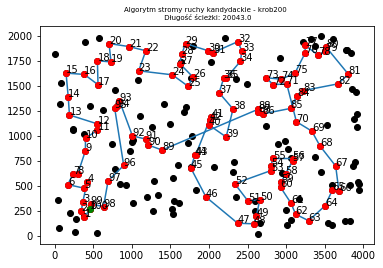

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [217]:
c = pd.read_csv("candidate_moveskrob200")
print(c.describe())
nn = c.loc[c["PathLen"] == c["PathLen"].min()]
print(nn)
print()
lat, lon = get_lat_lon_from_url(target_url=target_url_krob200)
distance_matrix = calc_matrix(lat, lon)
l = nn.FinalPath.to_list()[0]
new = l.replace(",", " ")
new = new[1:-1]
ne = new.split()
p = [int(i) for i in ne]
create_plot(
    p,
    lat,
    lon,
    "Algorytm stromy ruchy kandydackie - krob200",
    distance_matrix,
)